<a href="https://colab.research.google.com/github/Mikeike34/MLA_MJC/blob/main/FinalProject_Regression_MJC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Michael Cantone

#<u> Standard Imports

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#<u> Imports for Specific Models

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

#<u> Imports for Splitting Data and Building Pipeline

In [100]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#<u> Imports for Performance Measures

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#<u> Confusion Matrix Function

In [5]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#<u> ROC_Curve Function

In [41]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#<u> Reading the Data

In [85]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/advertising.csv')

In [86]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#<u>Statistical and Visual Exploration

In [17]:
df.sum()

,0
TV,29408.5
Radio,4652.8
Newspaper,6110.8
Sales,3026.1


In [18]:
df.count()

,0
TV,200
Radio,200
Newspaper,200
Sales,200


<Axes: title={'center': 'TV advertisments vs sales'}, xlabel='TV advertisements', ylabel='Sales'>

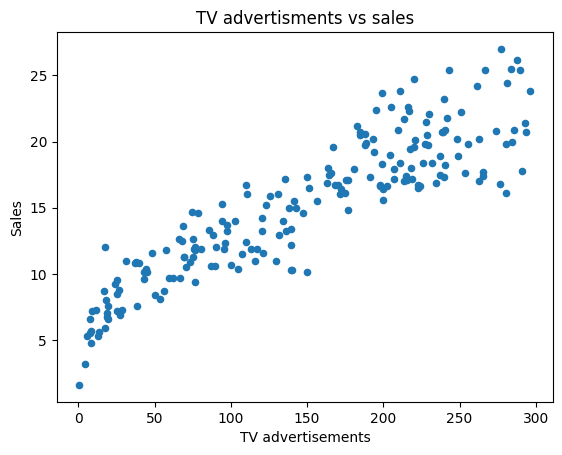

In [19]:
df.plot(kind='scatter', x='TV', y='Sales', xlabel='TV advertisements', ylabel='Sales', title='TV advertisments vs sales')

<Axes: title={'center': 'Radio advertisments vs sales'}, xlabel='Radio advertisements', ylabel='Sales'>

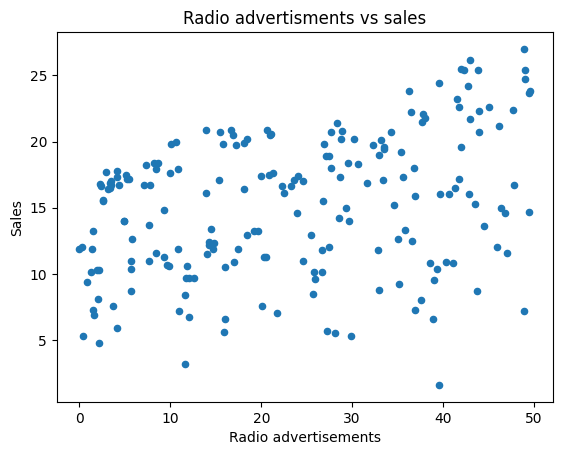

In [20]:
df.plot(kind='scatter', x='Radio', y='Sales', xlabel='Radio advertisements', ylabel='Sales', title='Radio advertisments vs sales')

<Axes: title={'center': 'Newspaper advertisments vs sales'}, xlabel='Newspaper advertisements', ylabel='Sales'>

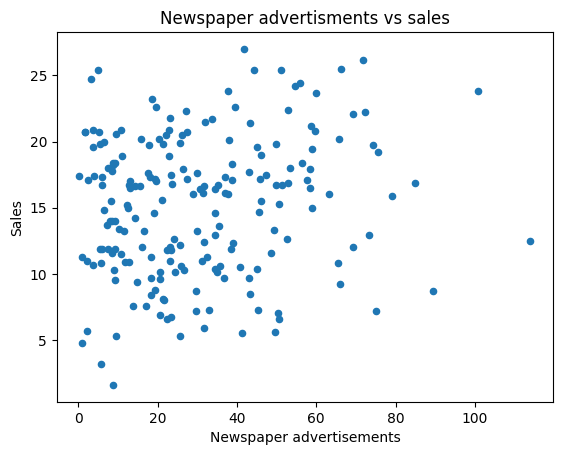

In [21]:
df.plot(kind='scatter', x='Newspaper', y='Sales', xlabel='Newspaper advertisements', ylabel='Sales', title='Newspaper advertisments vs sales')

These plots show that with TV advertisments, more advertisements seem to equal more sales but that isnt necessarily the case with Radio and Newspaper advertisements.

#<u>Splitting Data into Train/Test

In [24]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =.2, random_state =0)

#<u> Linear Regression Model

#<u>Building a Pipeline

In [32]:
num_attribs = ['TV', 'Radio', 'Newspaper']
cat_attribs = []

In [34]:
col_transform = ColumnTransformer([
    ('num', MinMaxScaler(), num_attribs)
], remainder = 'passthrough')

In [53]:
pipeline = Pipeline([
    ('col_transform', col_transform),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

#<u>Executing the Model

In [54]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['TV', 'Radio',
                                                   'Newspaper'])])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

#<u>Evaluating the Model

In [60]:
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)

<u>Test Dataset

In [135]:
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2: ", r2_score(y_test, y_test_pred))

MSE:  2.719724705352234
RMSE:  1.6491587871858289
R2:  0.9185176895823239


<u> Train Dataset

In [134]:
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2: ", r2_score(y_train, y_train_pred))

MSE:  2.719757290028167
RMSE:  1.6491686663371237
R2:  0.8959023009245445


We see that the model is consistent because the RSME is similar for both train and test data

according to the r2 score, our model is correct between 89% and 91% of the time.

#<u> Using an ROC Curve

In [136]:
df['HighSales']=(df['Sales'] > df['Sales'].median()).astype(int)

In [137]:
X = df[['TV', 'Radio', 'Newspaper']]
Y = df['HighSales']

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =.2, random_state =0)

In [141]:
pipeline = Pipeline([
    ('Scaler', MinMaxScaler()),
    ('Clf', LogisticRegression())
])

In [142]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('Scaler', MinMaxScaler()), ('Clf', LogisticRegression())])

In [143]:
Y_pred = pipeline.predict_proba(X_test)[:, 1]

In [144]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

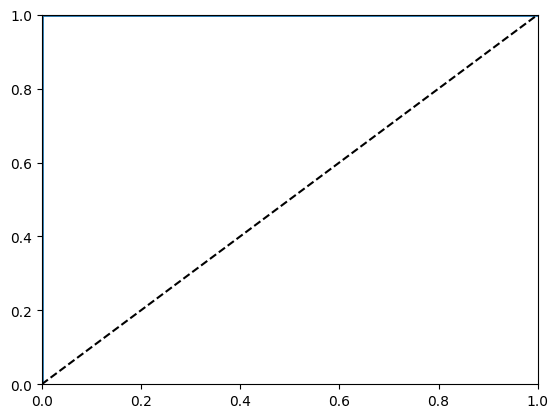

In [145]:
plot_roc_curve(fpr, tpr)

#<u>Grid Search

In [67]:
param_grid = {
    'poly__degree': [1,2,3]
}

In [68]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['TV',
                                                                          'Radio',
                                                                          'Newspaper'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]}, scoring='r2')

In [69]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'poly__degree': 2}
Best score:  0.9303342342693414


In [70]:
y_pred = grid_search.predict(x_test)
print("Test R2 Score: ", r2_score(y_test, y_pred))

Test R2 Score:  0.9185176895823239


#<u> Support Vector Machine Model

In [87]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [89]:
df_adType = pd.melt(
    df,
    id_vars=['Sales'],
    value_vars=['TV', 'Radio', 'Newspaper'],
    var_name = 'Ad_Type',
    value_name = 'Advertisements'
)

In [91]:
df_adType.head()

,Sales,Ad_Type,Advertisements
0,22.1,TV,230.1
1,10.4,TV,44.5
2,12.0,TV,17.2
3,16.5,TV,151.5
4,17.9,TV,180.8


<Axes: xlabel='Sales', ylabel='Advertisements'>

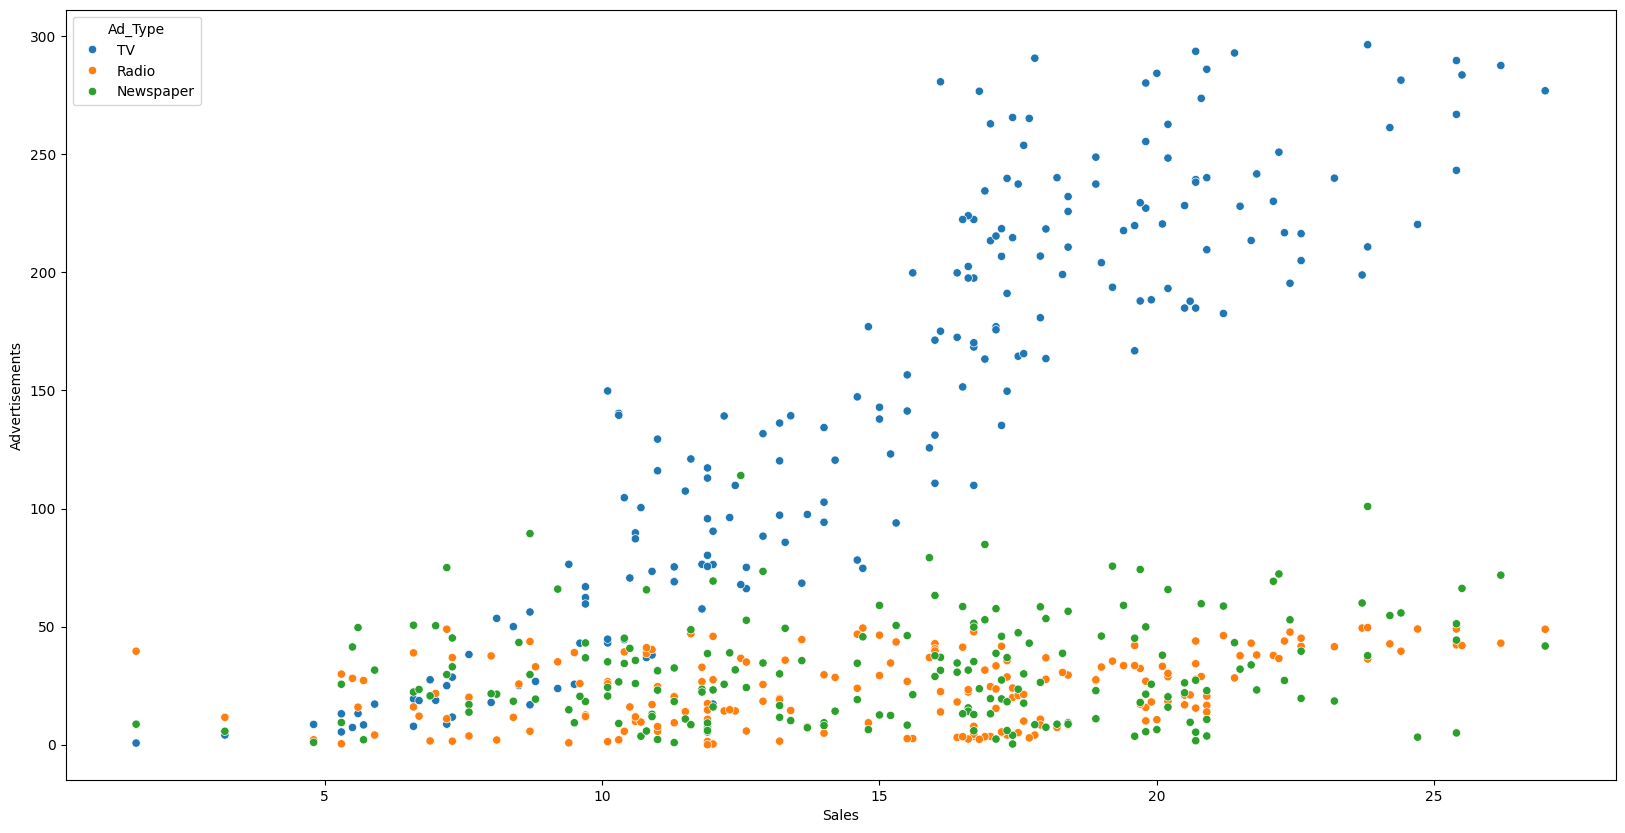

In [93]:
sns.color_palette('dark')
fig = plt.figure(figsize=(20,10))
sns.scatterplot( x= 'Sales', y = 'Advertisements', data = df_adType, hue ='Ad_Type')

#<u> Split into Train/Test

In [112]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =.2, random_state =0)

#<u> Building the Pipeline

In [114]:
num_attribs = ['TV', 'Radio', 'Newspaper']
cat_attribs = []

In [115]:
col_transform = ColumnTransformer([
    ('num', MinMaxScaler(), num_attribs),
])

In [119]:
pipeline = Pipeline([
    ('trans', col_transform),
    ('SVRLinear', SVR(kernel = 'linear', C=1, max_iter=100000)),
])

In [120]:
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['TV', 'Radio',
                                                   'Newspaper'])])),
                ('SVRLinear', SVR(C=1, kernel='linear', max_iter=100000))])

In [121]:
pipeline.fit(x_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['TV', 'Radio',
                                                   'Newspaper'])])),
                ('SVRLinear', SVR(C=1, kernel='linear', max_iter=100000))])

#<u> Evaluate the Model

In [122]:
y_pred = pipeline.predict(x_test)

<u>Test Dataset

In [128]:
print("MSE: ",mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2: ", r2_score(y_test, y_pred))

MSE:  5.192967434569294
RMSE:  2.2788083365147878
R2:  0.8444199210090061


<u>Train Dataset

In [131]:
y_train_pred = pipeline.predict(x_train)
print("MSE: ",mean_squared_error(y_train, y_train_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2: ", r2_score(y_train, y_train_pred))

MSE:  2.719757290028167
RMSE:  1.6491686663371237
R2:  0.8959023009245445


According to the RMSE we can see that our model is a little inconsistent because the RSME is not similar between the test and train datasets

According to the R2 scores, we can see that our model is correct between 84% and 89% of the time

#<u>Conclusion

In conclusion, the linear regression model seems to be more accurate in predicting sales than the support vector machine model. We can see this when looking at the RMSE and R2 results. <br> <br>The Linear regression model scored higher.